<a href="https://colab.research.google.com/github/huseynickishiyev/training-models/blob/main/linear_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup**

In [ ]:
!pip install -q sklearn
!pip install matplotlib
!pip install raven
!pip3 install six==1.15.0

In [3]:
%tensorflow_version 2.x

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

# Loading & Exploring Data

sex                      female
age                          38
n_siblings_spouses            1
parch                         0
fare                    71.2833
class                     First
deck                          C
embark_town           Cherbourg
alone                         n
Name: 1, dtype: object 1
              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000000   31.387500
max     80.000000            8.000000    5.000000  512.329200
627 264


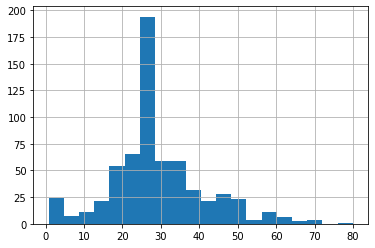

In [5]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
dftrain.head()
print(dftrain.loc[1], y_train.loc[1])
print(dftrain.describe())
print(dftrain.shape[0], dfeval.shape[0])
dftrain.age.hist(bins = 20)

## **Turning Categorical Data into Numeric Data for Linear Regression** 

In [6]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck','embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [26]:
print(feature_columns[0])

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


# **# Training Process;**

**Input Function (Epoch, Batches and etc.)**

In [13]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])
print(result)

0.7462121
{'accuracy': 0.7462121, 'accuracy_baseline': 0.625, 'auc': 0.82742584, 'auc_precision_recall': 0.79611, 'average_loss': 0.502987, 'label/mean': 0.375, 'loss': 0.49706337, 'precision': 0.63559324, 'prediction/mean': 0.4626722, 'recall': 0.75757575, 'global_step': 200}


In [21]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[3])
print(y_eval.loc[3])
print(result)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqxoz2y8j/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                            55
n_siblings_spouses              0
parch                           0
fare                           16
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
1
[{'logits': array([-1.8929918], dtype=float32), 'logistic': array([0.13090375], dtype=float32), 'probabilities': array([0.86909634, 0.13090374], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.41966078], dtype=float32), 'logistic': array([0.6034021], dtype=float32), 'probabilities': arr

In [25]:
print(result[4]['probabilities'][1])

0.40617013
